# 구글 마운트

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
# font_fname = 'C:/Users/hewo1/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf'
# font_family = fonm.FontProperties(fname=font_fname).get_name()
# plt.rcParams["font.family"] = font_family

In [ ]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
import warnings 
warnings.filterwarnings(action='ignore')

# 메이저리그 배럴 관하여
- 타율 0.5, 장타율 1.5이상을 생산하는 타구
- 최소 시속 98마일을 기록해야 함
- 98마일 기준 발사각도 26 ~ 30
- 100마일 ~ 116마일까지는 시속 1마일이 증가할 때마다 발사각도 2~3 증가
- 116마일 기준 발사각도 8 ~ 50

In [1]:
import pandas as pd
import numpy as np

In [2]:
batting_2018 = pd.read_csv('data/2018_batting.csv', encoding='cp949')
batting_2019 = pd.read_csv('data/2019_batting.csv', encoding='cp949')
batting_2020 = pd.read_csv('data/2020_batting.csv', encoding='cp949')
batting_2021 = pd.read_csv('data/2021_batting.csv', encoding='cp949')

batting = pd.concat([batting_2018, batting_2019,
                     batting_2020, batting_2021])

FileNotFoundError: ignored

In [ ]:
batting.columns = ['연도','경기코드','타구코드','선수코드',
                   '팀코드','이닝','타구속도','발사각도',
                   '타석결과','구속','구장']

In [ ]:
batting['경기코드']

In [ ]:
def date(data):
    return pd.to_datetime(data.str[0:8])

def month(data):
    return pd.to_datetime(data.str[0:8]).dt.month

def day(data):
    return pd.to_datetime(data.str[0:8]).dt.day

batting['날짜'] = date(batting['경기코드'])
batting['월'] = month(batting['경기코드'])
batting['일'] = day(batting['경기코드'])

In [ ]:
batting['날짜']

In [ ]:
batting = batting.drop(['경기코드','타구코드','팀코드'], axis=1)

In [ ]:
batting = batting[['선수코드','날짜','연도','월','일','타구속도','발사각도',
                   '타석결과','구속','이닝','구장']]

batting.head()

In [ ]:
batting['날짜'].min(), batting['날짜'].max()

In [ ]:
# 타구속도1 : 타구속도를 mph(마일)로 변환

batting['타구속도1'] = batting['타구속도'] * 0.621371

In [ ]:
print("국내 평균 타구속도 :", batting['타구속도1'].mean())
print("국내 평균 발사각도 :", batting['발사각도'].mean())

In [ ]:
display(batting.groupby('타석결과')['발사각도'].describe())
display(batting.groupby('타석결과')['타구속도'].describe())

In [ ]:
print("전체 타구 수 :", len(batting))

print("타구속도가 98 이상 :", len(batting[batting['타구속도1'] >= 98])) 

print("위에 2개 비율 :", len(batting[batting['타구속도1'] >= 98]) / len(batting['타구속도1']) * 100)

## 메이저리그 데이터 전처리

출처 : https://baseballsavant.mlb.com/leaderboard/statcast

- Batted Ball Event (BBE): 아웃, 안타, 실책 등의 결과를 만들어내는 모든 타구를 말한다.
- 파울 라인 안에 들어온 모든 타구는 BBE이며, 아웃이나 실책의 결과를 만들어내는 파울 타구 역시 포함된다. 
- BBE는 평균 타구 속도나 발사각 등을 결정할 때 분모로서 사용된다.

In [ ]:
mlb_2018 = pd.read_csv('data/2018_mlb.csv')
mlb_2019 = pd.read_csv('data/2019_mlb.csv')
mlb_2020 = pd.read_csv('data/2020_mlb.csv')
mlb_2021 = pd.read_csv('data/2021_mlb.csv')
mlb_2018['연도'] = 2018
mlb_2019['연도'] = 2019
mlb_2020['연도'] = 2020
mlb_2021['연도'] = 2021
 
mlb = pd.concat([mlb_2018, mlb_2019, 
                 mlb_2020, mlb_2021])

mlb['이름'] = mlb['last_name'] + mlb[' first_name']
mlb = mlb.drop(['last_name',' first_name','anglesweetspotpercent',
                'fbld','gb','ev95plus','ev95per-swing','ev95percent'], axis=1)

mlb.columns = ['아이디','BBE','발사각도','타구속도최대','타구속도평균',
               '타구거리최대','타구거리평균','예상홈런거리',
               '배럴','배럴BBE','배럴PA','연도','이름']

mlb['타구거리최대']  = (mlb['타구거리최대'] * 30.48) / 100 
mlb['타구거리평균']  = (mlb['타구거리평균'] * 30.48) / 100
mlb['예상홈런거리']  = (mlb['예상홈런거리'] * 30.48) / 100 

In [ ]:
mlb.head()

In [ ]:
barrel_bbe = mlb.sort_values(by='배럴BBE', ascending=False).head(10)
barrel_pa = mlb.sort_values(by='배럴PA', ascending=False).head(10)
barrel_b = mlb.sort_values(by='배럴', ascending=False).head(10)
print("2018~2021 메이저리그 배럴BBE TOP10")
display(barrel_bbe[['연도','이름','배럴BBE','배럴']])
print()
print("2018~2021 메이저리그 배럴PA TOP10")
display(barrel_pa[['연도','이름','배럴PA','배럴']])
print()
print("201/~2021 메이저리그 배럴 TOP10")
display(barrel_b[['연도','이름','배럴']])

## 홈런 타구속도, 발사각도 데이터

출처 : https://data.world/jolsufka/mlb-home-run-tracker-data
- 2006 ~ 2017 홈런 타구속도, 발사각도 데이터 

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://query.data.world/s/u2hpyvyblvvh3rzhcjbpzeox2phbvh')

In [ ]:
print("원본 데이터")
display(data.head())
data = data.drop(['VIDEO','PATH'], axis=1)
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
data['연도'] = data['GAME_DATE'].dt.year
data = data[['EXIT_VELOCITY','ELEVATION_ANGLE','연도']]
data.columns = ['타구속도','발사각도','연도']
data = data[data['타구속도'] != 0]
print("수정 데이터")
data.head()

## 국내 배팅 데이터

In [ ]:
batting_2018 = pd.read_csv('data/2018_batting.csv', encoding='cp949')
batting_2019 = pd.read_csv('data/2019_batting.csv', encoding='cp949')
batting_2020 = pd.read_csv('data/2020_batting.csv', encoding='cp949')
batting_2021 = pd.read_csv('data/2021_batting.csv', encoding='cp949')

batting = pd.concat([batting_2018, batting_2019,
                     batting_2020, batting_2021])

batting.columns = ['연도','경기코드','타구코드','선수코드',
                   '팀코드','이닝','타구속도','발사각도',
                   '타석결과','상대투수 타구구속','구장']

batting = batting[['연도','선수코드','경기코드','타구코드',
                  '팀코드','이닝','타구속도','발사각도',
                  '타석결과','상대투수 타구구속','구장']]

batting['타구속도1'] = np.round(batting['타구속도'] * 0.621371,1)

In [ ]:
batting_1 = batting[batting['타석결과'] == '1루타']
batting_2 = batting[batting['타석결과'] == '2루타']
batting_3 = batting[batting['타석결과'] == '3루타']
batting_hr = batting[batting['타석결과'] == '홈런']

In [ ]:
# 타석 결과 변수 처리, 장타율 1.5 이상을 가지는 타석 결과(2루타, 3루타, 홈런 → 1, 나머지 → 0) 

colors = [] #리스트 생성 
batting['colors'] = 0

for bat in batting['타석결과']:
    if bat == '홈런': 
        colors.append(1)
    elif bat == '2루타': 
        colors.append(1) 
    elif bat == '3루타': 
        colors.append(1) 
    else: 
        colors.append(0)

batting['colors'] = colors #colors열에 순차대로 원소를 대입

## MLB HR Tracker Data

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

print('메이저리그 홈런 분포도')
plt.scatter(data['발사각도'],data['타구속도'])
plt.xlim(0,50)
plt.xlabel('발사각도')
plt.ylabel('타구속도')
plt.show()

print('국내리그 홈런 분포도')
plt.scatter(batting_hr['발사각도'],batting_hr['타구속도1'])
plt.xlim(0,51)
plt.xlabel('발사각도')
plt.ylabel('타구속도')
plt.show()

print('국내리그 1루타 분포도')
plt.scatter(batting_1['발사각도'],batting_1['타구속도1'])
#plt.xlim(0,51)
plt.xlabel('발사각도')
plt.ylabel('타구속도')
plt.show()

print('국내리그 2루타 분포도')
plt.scatter(batting_2['발사각도'],batting_2['타구속도1'])
#plt.xlim(0,51)
plt.xlabel('발사각도')
plt.ylabel('타구속도')
plt.show()

print('국내리그 3루타 분포도')
plt.scatter(batting_3['발사각도'],batting_3['타구속도1'])
#plt.xlim(0,51)
plt.xlabel('발사각도')
plt.ylabel('타구속도')
plt.show()

In [ ]:
xx1 = np.linspace(116, 140, 50)
yy1 = [8]*50
xx2 = np.linspace(116, 140, 50)
yy2 = [50]*50
xx3 = [98]*50
yy3 = np.linspace(26, 30, 50)
xx4 = np.linspace(98, 116, 50)
yy4 = (10/9)*(xx4-98)+30
xx5 = np.linspace(98, 116, 50)
yy5 = -xx5 +124

print('메이저리그 홈런 분포도')
plt.plot(xx1, yy1)
plt.plot(xx2, yy2)
plt.plot(xx3, yy3)
plt.plot(xx4, yy4)
plt.plot(xx5, yy5)
plt.scatter(data['타구속도'], data['발사각도'],s=1)
# plt.xlim(0,51)
plt.xlabel('타구속도')
plt.ylabel('발사각도')
plt.show()

In [ ]:
plt.figure(figsize=(14,6))

plt.scatter(data['타구속도'],data['발사각도'],s=3, alpha=0.3, c='red')
plt.scatter(batting_hr['타구속도1'], batting_hr['발사각도'],s=3, alpha=0.3, c='blue')
plt.title('메이저리그 국내 리그 홈런 분포도')
plt.axvline(x=(batting_hr['타구속도1'].mean()), color='blue', linestyle=':', linewidth=1.5)
plt.axvline(x=(data['타구속도'].mean()), color='red', linestyle=':', linewidth=1.5)
plt.xlabel('타구속도')
plt.ylabel('발사각도')
plt.xlim(80, 120)
plt.ylim(10, 50)
plt.show()

In [ ]:
# 2018년 최저 발사각도 14.9, 2015년 13.5  2016년 14.2
# 2018년 최고 발사각도 49.4  2015년 49.7 2016년 47.8

print("메이저리그 홈런 최소 발사각도 :", data['발사각도'].min())
print("메이저리그 홈런 최대 발사각도 :", data['발사각도'].max())
print("메이저리그 홈런 평균 발사각도 :", data['발사각도'].mean())

In [ ]:
print("국내리그 홈런 최소 발사각도 :", batting_hr['발사각도'].min())
print("국내리그 홈런 최대 발사각도 :", batting_hr['발사각도'].max())
print("국내리그 홈런 평균 발사각도 :", batting_hr['발사각도'].mean())

In [ ]:
print("메이저리그 홈런 최소 타구속도 :", data['타구속도'].min())
print("메이저리그 홈런 최대 타구속도 :", data['타구속도'].max())
print("메이저리그 홈런 평균 타구속도 :", data['타구속도'].mean())

In [ ]:
print("국내리그 홈런 최소 타구속도 :", batting_hr['타구속도1'].min())
print("국내리그 홈런 최대 타구속도 :", batting_hr['타구속도1'].max())
print("국내리그 홈런 평균 타구속도 :", batting_hr['타구속도1'].mean())

# 다양한 방법으로 배럴 정의하기

## 1. 국내 배럴 기준을 적용해보자
참고 URL : http://www.spotvnews.co.kr/?mod=news&act=articleView&idxno=193801
- 타구 속도 155 ~ 160km 발사각도 22.5~35.0
- 타구 속도 160 ~ 165km 발사각도 20.0~37.5
- 타구 속도 165km 이상 발사각도 17.5~40.0

In [ ]:
batting['배럴'] = np.where((batting['타구속도'] >= 155) & (batting['타구속도'] < 160) & (batting['발사각도'] >= 22.5) & (batting['발사각도'] < 35.0) 
                            |
                           (batting['타구속도'] >= 160) & (batting['타구속도'] < 165) & (batting['발사각도'] >= 20.0) & (batting['발사각도'] < 37.5) 
                            |
                           (batting['타구속도'] >= 165) & (batting['발사각도'] >= 17.5) & (batting['발사각도'] >= 17.5) & (batting['발사각도'] < 40.0), 1, 0)

In [ ]:
barrel = batting[batting['배럴'] == 1]

In [ ]:
print("전체 타구 수 :", len(batting))

print("배럴 타구 수 :", len(barrel)) 

print("배럴 타구 비율 :", len(barrel) / len(batting) * 100)

전체 타구 수 : 120745
배럴 타구 수 : 2697
배럴 타구 비율 : 2.233632862644416


In [ ]:
print("전체 타구 타석 결과 :")
print(batting['타석결과'].value_counts())
print()

print("배럴 타구 타석 결과 :")
print(barrel['타석결과'].value_counts())

전체 타구 타석 결과 :
플라이          36540
1루타          29235
땅볼아웃         26507
2루타           8146
홈런            4732
파울플라이         4097
직선타           3602
병살타           3085
내야안타(1루타)     1810
희생플라이         1603
3루타            672
인필드플라이         331
희생번트           239
야수선택            52
번트안타            48
번트아웃            44
삼중살타             2
Name: 타석결과, dtype: int64

배럴 타구 타석 결과 :
홈런       2064
플라이       288
2루타       279
3루타        32
1루타        22
희생플라이      11
직선타         1
Name: 타석결과, dtype: int64


In [ ]:
print("1루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '1루타']) / len(batting[batting['타석결과'] == '1루타']) * 100)
print("2루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '2루타']) / len(batting[batting['타석결과'] == '2루타']) * 100)
print("3루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '3루타']) / len(batting[batting['타석결과'] == '3루타']) * 100)
print("홈런 배럴 비율 :", len(barrel[barrel['타석결과'] == '홈런']) / len(batting[batting['타석결과'] == '홈런']) * 100)

1루타 배럴 비율 : 0.07525226611937746
2루타 배럴 비율 : 3.4249938620181686
3루타 배럴 비율 : 4.761904761904762
홈런 배럴 비율 : 43.61792054099746


### 메이저리그 국내리그 비교

In [ ]:
mlb_2018 = mlb[mlb['연도'] == 2018]
mlb_2019 = mlb[mlb['연도'] == 2019]
mlb_2020 = mlb[mlb['연도'] == 2020]
mlb_2021 = mlb[mlb['연도'] == 2021]

print("메이저리그")
print("2018년 1명당 배럴 타구 수", mlb_2018['배럴'].mean())
print("2019년 1명당 배럴 타구 수", mlb_2019['배럴'].mean())
print("2020년 1명당 배럴 타구 수", mlb_2020['배럴'].mean())
print("2021년 1명당 배럴 타구 수", mlb_2021['배럴'].mean())

메이저리그
2018년 1명당 배럴 타구 수 31.31159420289855
2019년 1명당 배럴 타구 수 35.03703703703704
2020년 1명당 배럴 타구 수 13.02112676056338
2021년 1명당 배럴 타구 수 28.1875


In [ ]:
barrel_2018 = barrel[barrel['연도'] == 2018]
barrel_2019 = barrel[barrel['연도'] == 2019]
barrel_2020 = barrel[barrel['연도'] == 2020]
barrel_2021 = barrel[barrel['연도'] == 2021]

print("국내리그")
print("2018년 1명당 배럴 타구 수", len(barrel_2018) / batting_2018['PCODE'].nunique())
print("2019년 1명당 배럴 타구 수", len(barrel_2019) / batting_2019['PCODE'].nunique())
print("2020년 1명당 배럴 타구 수", len(barrel_2020) / batting_2020['PCODE'].nunique())
print("2021년 1명당 배럴 타구 수", len(barrel_2021) / batting_2021['PCODE'].nunique())

국내리그
2018년 1명당 배럴 타구 수 3.6954887218045114
2019년 1명당 배럴 타구 수 2.2918149466192173
2020년 1명당 배럴 타구 수 2.6559139784946235
2021년 1명당 배럴 타구 수 1.3765690376569037


In [ ]:
batting[batting['배럴'] == 1]['선수코드'].nunique(), batting['선수코드'].nunique()

(220, 437)

### 배럴 기준 적용 시각화

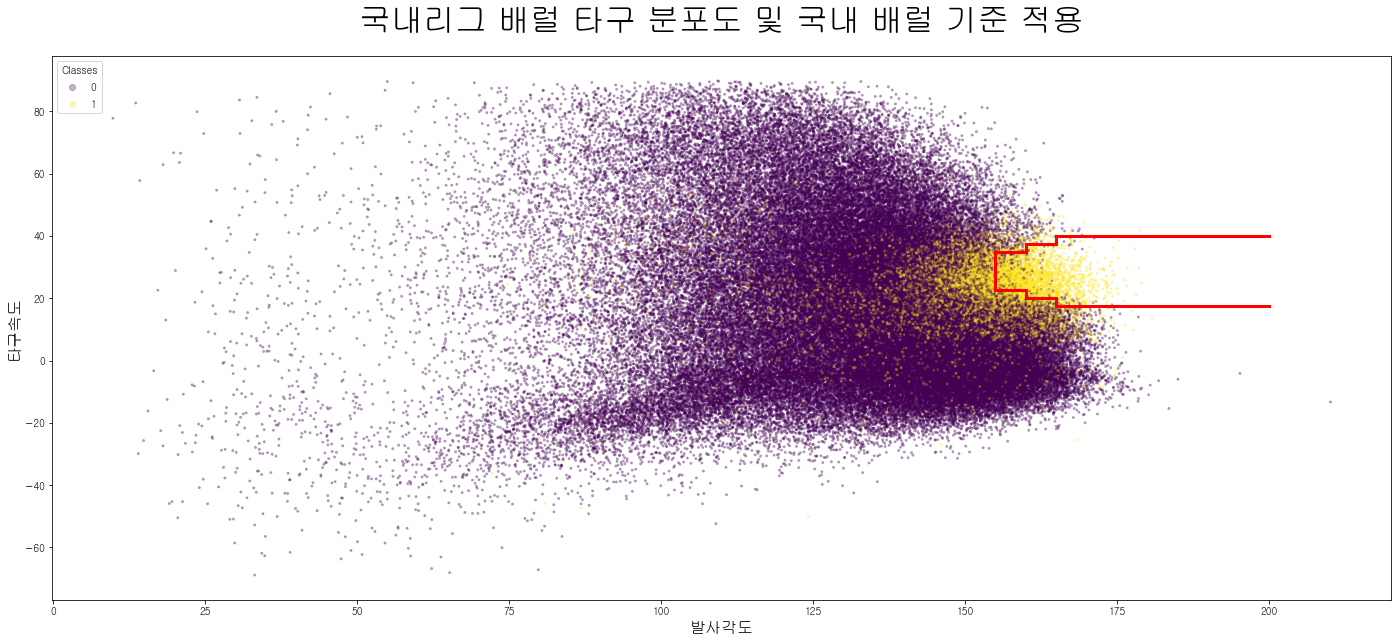

In [ ]:
xx1 = np.linspace(155, 160, 50)
yy1 = [22.5]*50
xx2 = np.linspace(155, 160, 50)
yy2 = [35]*50
xx3 = [155]*50
yy3 = np.linspace(22.5, 35, 50)
xx4 = np.linspace(160, 165, 50)
yy4 = [20]*50
xx5 = np.linspace(160, 165, 50)
yy5 = [37.5]*50
xx6 = [160]*50
yy6 = np.linspace(35, 37.5, 50)
xx7 = np.linspace(165, 200, 50)
yy7= [17.5]*50
xx8 = np.linspace(165, 200, 50)
yy8 = [40]*50
xx9 = [165]*50
yy9 = np.linspace(37.5, 40, 50)
xx10 = [165]*50
yy10 = np.linspace(17.5, 20, 50)
xx11 = [160]*50
yy11 = np.linspace(20, 22.5, 50)

plt.figure(figsize=(24,10))
line1 = plt.plot(xx1, yy1)
line2 = plt.plot(xx2, yy2)
line3 = plt.plot(xx3, yy3)
line4 = plt.plot(xx4, yy4)
line5 = plt.plot(xx5, yy5)
line6 = plt.plot(xx6, yy6)
line7 = plt.plot(xx7, yy7)
line8 = plt.plot(xx8, yy8)
line9 = plt.plot(xx9, yy9)
line10 = plt.plot(xx10, yy10)
line11 = plt.plot(xx11, yy11)
line = [line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11]
plt.setp(line, color='r', linewidth=3.0)
scatter = plt.scatter(batting['타구속도'], batting['발사각도'], s=4, c=batting['colors'], label=batting['colors'], alpha=0.3)
plt.legend(*scatter.legend_elements(),
            loc="upper left", title="Classes")
plt.title('국내리그 배럴 타구 분포도 및 국내 배럴 기준 적용', fontdict={'fontsize': 32, 'fontweight': 'bold'}, pad=26)
plt.xlabel('발사각도', fontdict={'fontsize': 16})
plt.ylabel('타구속도', fontdict={'fontsize': 16})
plt.show()

In [ ]:
accuracy = np.mean(np.equal(batting['colors'], batting['배럴']))
print('배럴 정확도: ', accuracy)

배럴 정확도:  0.9047828067414799


## 2. 메이저 배럴 기준을 적용해보자
참고 URL : https://tht.fangraphs.com/the-physics-of-barreled-balls/
- 타구 속도 98마일 발사각도 26°~ 30°
- 타구 속도 116마일 이상 발사각도 8°~ 50°
- 아래 그래프 같이 일차 함수 조건

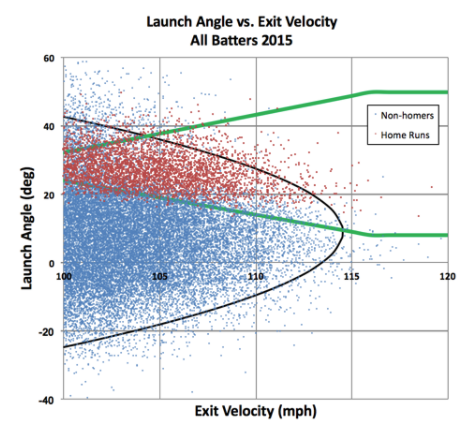

In [ ]:
batting['배럴'] = np.where((batting['발사각도'] >= 8) 
                            & (batting['발사각도'] <= 50) 
                            & (batting['타구속도1'] >= 98) 
                            & (batting['타구속도1'] * (10/9) - batting['발사각도'] >= 78.89) 
                            & (batting['타구속도1'] + batting['발사각도'] >= 124), 1, 0)

In [ ]:
barrel = batting[batting['배럴'] == 1]

In [ ]:
print("전체 타구 수 :", len(batting))

print("배럴 타구 수 :", len(barrel)) 

print("배럴 타구 비율 :", len(barrel) / len(batting) * 100)

전체 타구 수 : 120745
배럴 타구 수 : 4705
배럴 타구 비율 : 3.8966416828854196


In [ ]:
print("전체 타구 타석 결과 :")
print(batting['타석결과'].value_counts())
print()

print("배럴 타구 타석 결과 :")
print(barrel['타석결과'].value_counts())

전체 타구 타석 결과 :
플라이          36540
1루타          29235
땅볼아웃         26507
2루타           8146
홈런            4732
파울플라이         4097
직선타           3602
병살타           3085
내야안타(1루타)     1810
희생플라이         1603
3루타            672
인필드플라이         331
희생번트           239
야수선택            52
번트안타            48
번트아웃            44
삼중살타             2
Name: 타석결과, dtype: int64

배럴 타구 타석 결과 :
홈런       1485
2루타      1291
1루타      1092
플라이       494
직선타       236
3루타        69
희생플라이      35
땅볼아웃        3
Name: 타석결과, dtype: int64


In [ ]:
print("1루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '1루타']) / len(batting[batting['타석결과'] == '1루타']) * 100)
print("2루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '2루타']) / len(batting[batting['타석결과'] == '2루타']) * 100)
print("3루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '3루타']) / len(batting[batting['타석결과'] == '3루타']) * 100)
print("홈런 배럴 비율 :", len(barrel[barrel['타석결과'] == '홈런']) / len(batting[batting['타석결과'] == '홈런']) * 100)

1루타 배럴 비율 : 3.7352488455618267
2루타 배럴 비율 : 15.848269089123496
3루타 배럴 비율 : 10.267857142857142
홈런 배럴 비율 : 31.382079459002536


### 메이저리그 국내리그 비교

In [ ]:
mlb_2018 = mlb[mlb['연도'] == 2018]
mlb_2019 = mlb[mlb['연도'] == 2019]
mlb_2020 = mlb[mlb['연도'] == 2020]
mlb_2021 = mlb[mlb['연도'] == 2021]

print("메이저리그")
print("2018년 1명당 배럴 타구 수", mlb_2018['배럴'].mean())
print("2019년 1명당 배럴 타구 수", mlb_2019['배럴'].mean())
print("2020년 1명당 배럴 타구 수", mlb_2020['배럴'].mean())
print("2021년 1명당 배럴 타구 수", mlb_2021['배럴'].mean())

메이저리그
2018년 1명당 배럴 타구 수 31.31159420289855
2019년 1명당 배럴 타구 수 35.03703703703704
2020년 1명당 배럴 타구 수 13.02112676056338
2021년 1명당 배럴 타구 수 28.1875


In [ ]:
barrel_2018 = barrel[barrel['연도'] == 2018]
barrel_2019 = barrel[barrel['연도'] == 2019]
barrel_2020 = barrel[barrel['연도'] == 2020]
barrel_2021 = barrel[barrel['연도'] == 2021]

print("국내리그")
print("2018년 1명당 배럴 타구 수", len(barrel_2018) / batting_2018['PCODE'].nunique())
print("2019년 1명당 배럴 타구 수", len(barrel_2019) / batting_2019['PCODE'].nunique())
print("2020년 1명당 배럴 타구 수", len(barrel_2020) / batting_2020['PCODE'].nunique())
print("2021년 1명당 배럴 타구 수", len(barrel_2021) / batting_2021['PCODE'].nunique())

국내리그
2018년 1명당 배럴 타구 수 6.642857142857143
2019년 1명당 배럴 타구 수 3.8185053380782916
2020년 1명당 배럴 타구 수 4.648745519713262
2021년 1명당 배럴 타구 수 2.3765690376569037


In [ ]:
batting[batting['배럴'] == 1]['선수코드'].nunique(), batting['선수코드'].nunique()

(234, 437)

### 배럴 기준 적용 시각화

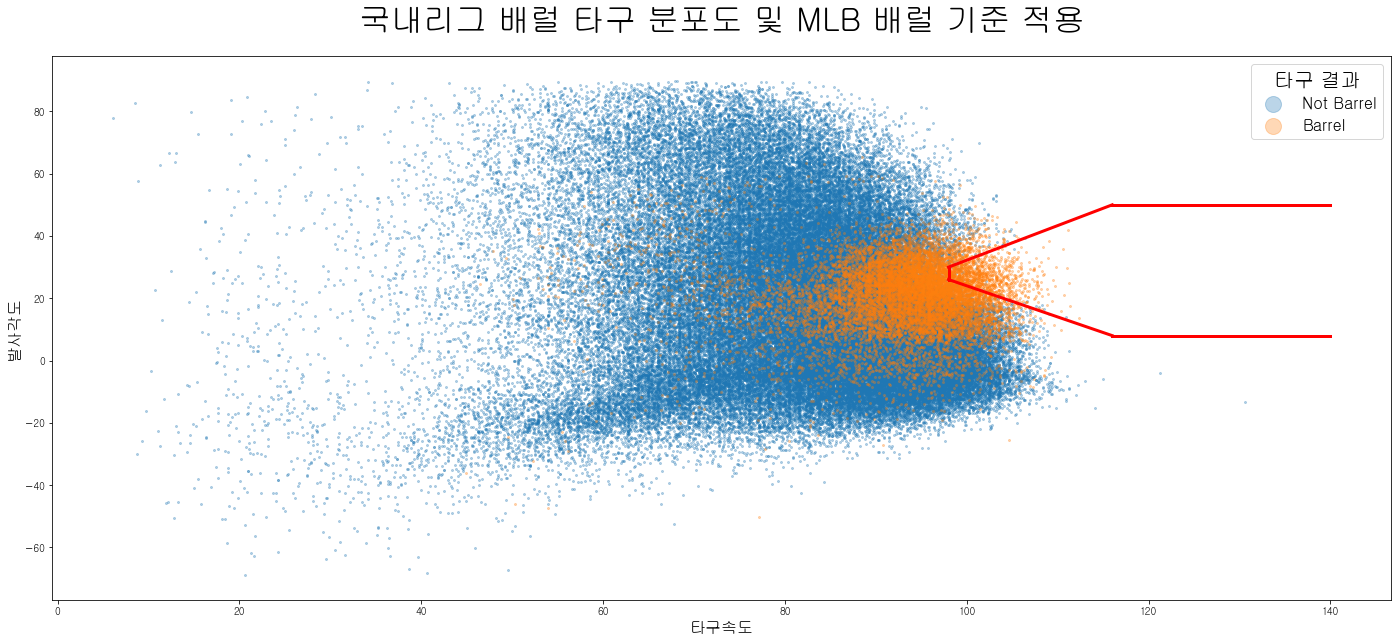

In [ ]:
xx1 = np.linspace(116, 140, 50)
yy1 = [8]*50
xx2 = np.linspace(116, 140, 50)
yy2 = [50]*50
xx3 = [98]*50
yy3 = np.linspace(26, 30, 50)
xx4 = np.linspace(98, 116, 50)
yy4 = (10/9)*(xx4-98)+30
xx5 = np.linspace(98, 116, 50)
yy5 = -xx5 +124

plt.figure(figsize=(24,10))
line1 = plt.plot(xx1, yy1)
line2 = plt.plot(xx2, yy2)
line3 = plt.plot(xx3, yy3)
line4 = plt.plot(xx4, yy4)
line5 = plt.plot(xx5, yy5)
line = [line1, line2, line3, line4, line5]
plt.setp(line, color='r', linewidth=3.0)
# 'Not barrel', "barrel"
scatter = plt.scatter(batting[batting['colors']==0].타구속도1, batting[batting['colors']==0].발사각도, s=4, label='Not Barrel', alpha=0.3)
scatter = plt.scatter(batting[batting['colors']==1].타구속도1, batting[batting['colors']==1].발사각도, s=4, label="Barrel", alpha=0.3)
plt.legend(loc="upper right", title="타구 결과", title_fontsize=20, fontsize=16, markerscale=8)
plt.title('국내리그 배럴 타구 분포도 및 MLB 배럴 기준 적용', fontdict={'fontsize': 32, 'fontweight': 'bold'}, pad=26)
plt.xlabel('타구속도', fontdict={'fontsize': 16})
plt.ylabel('발사각도', fontdict={'fontsize': 16})
plt.show()

In [ ]:
accuracy = np.mean(np.equal(batting['colors'], batting['배럴']))
print('배럴 정확도: ', accuracy)

배럴 정확도:  0.8959377199884053


## 3. 메이저 배럴 기준(외국인 코드)을 적용해보자
참고 URL : https://rdrr.io/github/BillPetti/baseballr/src/R/code_barrel.R
- 타구 속도 98마일 이상
- 발사각도 50°이하
- 발사각도가 (타구 속도 × 1.5 - 117) 이하
- 발사각도와 타구 속도의 합이 124 이상

In [ ]:
batting['배럴'] = np.where((batting['발사각도'] <= 50) 
                            & (batting['타구속도1'] >= 98) 
                            & (batting['타구속도1'] * 1.5 - batting['발사각도'] >= 117) 
                            & (batting['타구속도1'] + batting['발사각도'] >= 124), 1, 0)

In [ ]:
barrel = batting[batting['배럴'] == 1]

In [ ]:
print("전체 타구 수 :", len(batting))

print("배럴 타구 수 :", len(barrel)) 

print("배럴 타구 비율 :", len(barrel) / len(batting) * 100)

전체 타구 수 : 120745
배럴 타구 수 : 10525
배럴 타구 비율 : 8.716717048324982


In [ ]:
print("전체 타구 타석 결과 :")
print(batting['타석결과'].value_counts())
print()

print("배럴 타구 타석 결과 :")
print(barrel['타석결과'].value_counts())

전체 타구 타석 결과 :
플라이          36540
1루타          29235
땅볼아웃         26507
2루타           8146
홈런            4732
파울플라이         4097
직선타           3602
병살타           3085
내야안타(1루타)     1810
희생플라이         1603
3루타            672
인필드플라이         331
희생번트           239
야수선택            52
번트안타            48
번트아웃            44
삼중살타             2
Name: 타석결과, dtype: int64

배럴 타구 타석 결과 :
1루타          3774
땅볼아웃         2150
2루타          1546
홈런           1520
플라이           504
직선타           463
병살타           315
내야안타(1루타)     127
3루타            86
희생플라이          36
야수선택            3
파울플라이           1
Name: 타석결과, dtype: int64


In [ ]:
print("1루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '1루타']) / len(batting[batting['타석결과'] == '1루타']) * 100)
print("2루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '2루타']) / len(batting[batting['타석결과'] == '2루타']) * 100)
print("3루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '3루타']) / len(batting[batting['타석결과'] == '3루타']) * 100)
print("홈런 배럴 비율 :", len(barrel[barrel['타석결과'] == '홈런']) / len(batting[batting['타석결과'] == '홈런']) * 100)

1루타 배럴 비율 : 12.909184197024114
2루타 배럴 비율 : 18.978639823226125
3루타 배럴 비율 : 12.797619047619047
홈런 배럴 비율 : 32.12172442941674


### 메이저리그 국내리그 비교

In [ ]:
mlb_2018 = mlb[mlb['연도'] == 2018]
mlb_2019 = mlb[mlb['연도'] == 2019]
mlb_2020 = mlb[mlb['연도'] == 2020]
mlb_2021 = mlb[mlb['연도'] == 2021]

print("메이저리그")
print("2018년 1명당 배럴 타구 수", mlb_2018['배럴'].mean())
print("2019년 1명당 배럴 타구 수", mlb_2019['배럴'].mean())
print("2020년 1명당 배럴 타구 수", mlb_2020['배럴'].mean())
print("2021년 1명당 배럴 타구 수", mlb_2021['배럴'].mean())

메이저리그
2018년 1명당 배럴 타구 수 31.31159420289855
2019년 1명당 배럴 타구 수 35.03703703703704
2020년 1명당 배럴 타구 수 13.02112676056338
2021년 1명당 배럴 타구 수 28.1875


In [ ]:
barrel_2018 = barrel[barrel['연도'] == 2018]
barrel_2019 = barrel[barrel['연도'] == 2019]
barrel_2020 = barrel[barrel['연도'] == 2020]
barrel_2021 = barrel[barrel['연도'] == 2021]

print("국내리그")
print("2018년 1명당 배럴 타구 수", len(barrel_2018) / batting_2018['PCODE'].nunique())
print("2019년 1명당 배럴 타구 수", len(barrel_2019) / batting_2019['PCODE'].nunique())
print("2020년 1명당 배럴 타구 수", len(barrel_2020) / batting_2020['PCODE'].nunique())
print("2021년 1명당 배럴 타구 수", len(barrel_2021) / batting_2021['PCODE'].nunique())

국내리그
2018년 1명당 배럴 타구 수 14.131578947368421
2019년 1명당 배럴 타구 수 9.13167259786477
2020년 1명당 배럴 타구 수 10.207885304659499
2021년 1명당 배럴 타구 수 5.656903765690377


In [ ]:
batting[batting['배럴'] == 1]['선수코드'].nunique(), batting['선수코드'].nunique()

(299, 437)

### 배럴 기준 적용 시각화

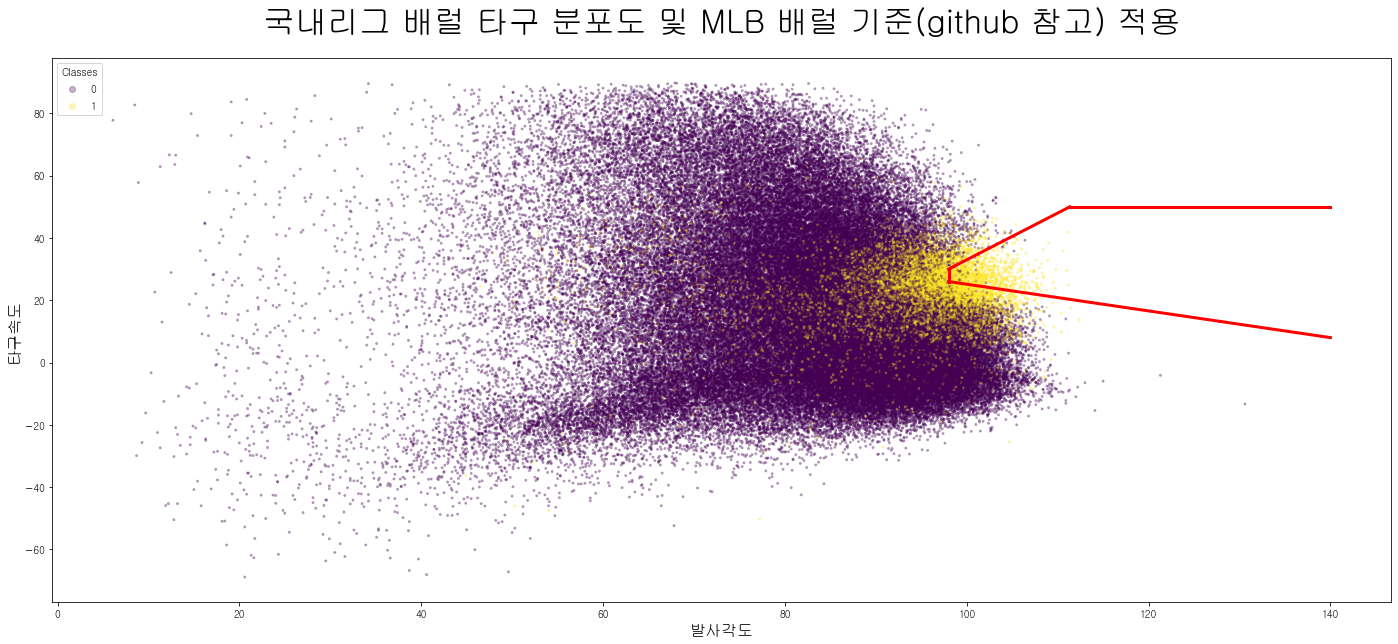

In [ ]:
xx1 = np.linspace(111.333, 140, 50)
yy1 = [50]*50
xx2 = np.linspace(98, 140, 50)
yy2 = -xx5 +124
xx3 = [98]*50
yy3 = np.linspace(26, 30, 50)
xx4 = np.linspace(98, 111.333, 50)
yy4 = (1.5)*(xx4)-117

plt.figure(figsize=(24,10))
line1 = plt.plot(xx1, yy1)
line2 = plt.plot(xx2, yy2)
line3 = plt.plot(xx3, yy3)
line4 = plt.plot(xx4, yy4)
line = [line1, line2, line3, line4]
plt.setp(line, color='r', linewidth=3.0)
scatter = plt.scatter(batting['타구속도1'], batting['발사각도'], s=4, c=batting['colors'], label=batting['colors'], alpha=0.3)
plt.legend(*scatter.legend_elements(),
            loc="upper left", title="Classes")
plt.title('국내리그 배럴 타구 분포도 및 MLB 배럴 기준(github 참고) 적용', fontdict={'fontsize': 32, 'fontweight': 'bold'}, pad=26)
plt.xlabel('발사각도', fontdict={'fontsize': 16})
plt.ylabel('타구속도', fontdict={'fontsize': 16})
plt.show()

In [ ]:
accuracy = np.mean(np.equal(batting['colors'], batting['배럴']))
print('배럴 정확도: ', accuracy)

배럴 정확도:  0.8528220630253841


## 4. 메이저 배럴 기준을 한국식으로(타구 속도 7 감소) 적용해보자
- 타구 속도 91마일 이상
- 발사각도 8°이상
- 발사각도 50°이하
- 발사각도가 (타구 속도 + 7) × 10/9 - 78.89 이하
- 발사각도와 타구 속도의 합이 117 이상

### **타구 속도 감소 이유**

- 발사각도 범위 비슷

- 타구속도 평균적으로 낮은 수치

In [ ]:
batting['배럴'] = np.where((batting['발사각도'] >= 8) 
                            & (batting['발사각도'] <= 50) 
                            & (batting['타구속도1'] >= 91) 
                            & ((batting['타구속도1'] + 7) * (10/9) - batting['발사각도'] >= 78.89) 
                            & (batting['타구속도1'] + batting['발사각도'] >= 117), 1, 0)

In [ ]:
barrel = batting[batting['배럴'] == 1]

In [ ]:
print("전체 타구 수 :", len(batting))

print("배럴 타구 수 :", len(barrel)) 

print("배럴 타구 비율 :", len(barrel) / len(batting) * 100)

전체 타구 수 : 120745
배럴 타구 수 : 6893
배럴 타구 비율 : 5.708724998964761


In [ ]:
print("전체 타구 타석 결과 :")
print(batting['타석결과'].value_counts())
print()

print("배럴 타구 타석 결과 :")
print(barrel['타석결과'].value_counts())

전체 타구 타석 결과 :
플라이          36540
1루타          29235
땅볼아웃         26507
2루타           8146
홈런            4732
파울플라이         4097
직선타           3602
병살타           3085
내야안타(1루타)     1810
희생플라이         1603
3루타            672
인필드플라이         331
희생번트           239
야수선택            52
번트안타            48
번트아웃            44
삼중살타             2
Name: 타석결과, dtype: int64

배럴 타구 타석 결과 :
홈런       3487
플라이      1632
2루타      1351
1루타       178
3루타       128
희생플라이      83
직선타        34
Name: 타석결과, dtype: int64


In [ ]:
print("1루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '1루타']) / len(batting[batting['타석결과'] == '1루타']) * 100)
print("2루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '2루타']) / len(batting[batting['타석결과'] == '2루타']) * 100)
print("3루타 배럴 비율 :", len(barrel[barrel['타석결과'] == '3루타']) / len(batting[batting['타석결과'] == '3루타']) * 100)
print("홈런 배럴 비율 :", len(barrel[barrel['타석결과'] == '홈런']) / len(batting[batting['타석결과'] == '홈런']) * 100)

1루타 배럴 비율 : 0.6088592440567813
2루타 배럴 비율 : 16.58482690891235
3루타 배럴 비율 : 19.047619047619047
홈런 배럴 비율 : 73.68977176669485


### 메이저리그 국내리그 비교

In [ ]:
mlb_2018 = mlb[mlb['연도'] == 2018]
mlb_2019 = mlb[mlb['연도'] == 2019]
mlb_2020 = mlb[mlb['연도'] == 2020]
mlb_2021 = mlb[mlb['연도'] == 2021]

print("메이저리그")
print("2018년 1명당 배럴 타구 수", mlb_2018['배럴'].mean())
print("2019년 1명당 배럴 타구 수", mlb_2019['배럴'].mean())
print("2020년 1명당 배럴 타구 수", mlb_2020['배럴'].mean())
print("2021년 1명당 배럴 타구 수", mlb_2021['배럴'].mean())

메이저리그
2018년 1명당 배럴 타구 수 31.31159420289855
2019년 1명당 배럴 타구 수 35.03703703703704
2020년 1명당 배럴 타구 수 13.02112676056338
2021년 1명당 배럴 타구 수 28.1875


In [ ]:
barrel_2018 = barrel[barrel['연도'] == 2018]
barrel_2019 = barrel[barrel['연도'] == 2019]
barrel_2020 = barrel[barrel['연도'] == 2020]
barrel_2021 = barrel[barrel['연도'] == 2021]

print("국내리그")
print("2018년 1명당 배럴 타구 수", len(barrel_2018) / batting_2018['PCODE'].nunique())
print("2019년 1명당 배럴 타구 수", len(barrel_2019) / batting_2019['PCODE'].nunique())
print("2020년 1명당 배럴 타구 수", len(barrel_2020) / batting_2020['PCODE'].nunique())
print("2021년 1명당 배럴 타구 수", len(barrel_2021) / batting_2021['PCODE'].nunique())

국내리그
2018년 1명당 배럴 타구 수 8.62781954887218
2019년 1명당 배럴 타구 수 6.2313167259786475
2020년 1명당 배럴 타구 수 6.949820788530466
2021년 1명당 배럴 타구 수 3.799163179916318


In [ ]:
batting[batting['배럴'] == 1]['선수코드'].nunique(), batting['선수코드'].nunique()

(295, 437)

### 배럴 기준 적용 시각화

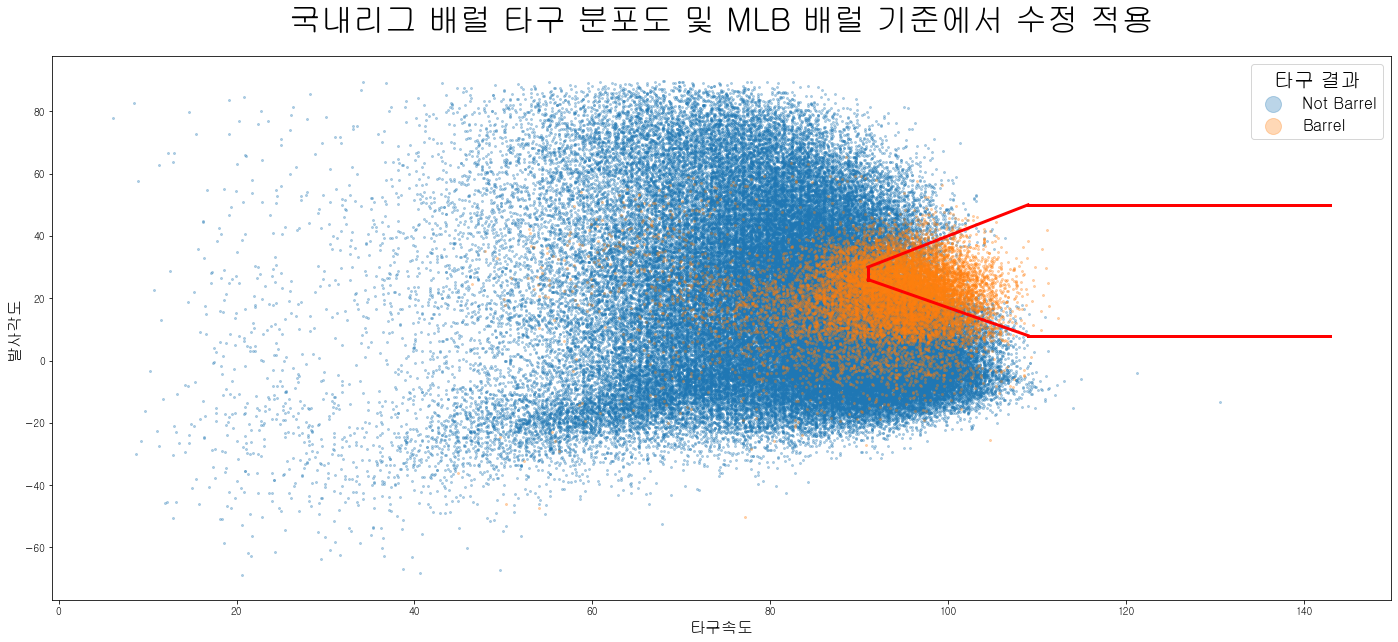

In [ ]:
xx1 = np.linspace(109, 143, 50)
yy1 = [8]*50
xx2 = np.linspace(109, 143, 50)
yy2 = [50]*50
xx3 = [91]*50
yy3 = np.linspace(26, 30, 50)
xx4 = np.linspace(91, 109, 50)
yy4 = (10/9)*(xx4-91)+30
xx5 = np.linspace(91, 109, 50)
yy5 = -xx5 +117

plt.figure(figsize=(24,10))
line1 = plt.plot(xx1, yy1)
line2 = plt.plot(xx2, yy2)
line3 = plt.plot(xx3, yy3)
line4 = plt.plot(xx4, yy4)
line5 = plt.plot(xx5, yy5)
line = [line1, line2, line3, line4, line5]
plt.setp(line, color='r', linewidth=3.0)
scatter = plt.scatter(batting[batting['colors']==0].타구속도1, batting[batting['colors']==0].발사각도, s=4, label='Not Barrel', alpha=0.3)
scatter = plt.scatter(batting[batting['colors']==1].타구속도1, batting[batting['colors']==1].발사각도, s=4, label="Barrel", alpha=0.3)
plt.legend(loc="upper right", title="타구 결과", title_fontsize=20, fontsize=16, markerscale=8)
plt.title('국내리그 배럴 타구 분포도 및 MLB 배럴 기준에서 수정 적용', fontdict={'fontsize': 32, 'fontweight': 'bold'}, pad=26)
plt.xlabel('타구속도', fontdict={'fontsize': 16})
plt.ylabel('발사각도', fontdict={'fontsize': 16})
plt.show()

In [ ]:
accuracy = np.mean(np.equal(batting['colors'], batting['배럴']))
print('배럴 정확도: ', accuracy)

배럴 정확도:  0.9129487763468467
